In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [2]:
# Import data from the listed url
train = np.loadtxt(np.DataSource().open('http://www.amlbook.com/data/zip/features.train'), dtype=float)
test = np.loadtxt(np.DataSource().open('http://www.amlbook.com/data/zip/features.test'), dtype=float)

In [3]:
def fit_number(x1, x2, y, number=0, penalty=0.01, q=3, plot=False):
    ova_y = np.copy(y)
    ova_y[y != number] = -1
    ova_y[y == number] = 1
    X = np.c_[x1, x2]
    clf = SVC(C=penalty, kernel='poly', degree=q)
    clf.fit(X, ova_y)
    
    predictions = clf.predict(X)
    e_in = np.mean(ova_y != predictions)
    n_sv = np.sum(clf.n_support_)
    
    if plot:
        colors = np.copy(train[:, 0])
        colors = colors == number
        plt.scatter(x1, x2, c=colors, alpha=0.3)
        plt.show()
        
    return e_in, n_sv

In [4]:
def cv(x1, x2, y):
    indices = np.random.permutation(len(x1))
    

In [5]:
y, x1, x2 = train[:, 0], train[:, 1], train[:, 2]
for i in range(0, 10, 2):
    print('For number = %d'% i)
    print('In-sample error = %.6f   |   Number of support vectors = %d' % fit_number(x1, x2, y, number=i))
    
for i in range(1, 10, 2):
    print('For number = %d'% i)
    print('In-sample error = %.6f   |   Number of support vectors = %d' % fit_number(x1, x2, y, number=i))

For number = 0
In-sample error = 0.129886   |   Number of support vectors = 2248
For number = 2
In-sample error = 0.100261   |   Number of support vectors = 1477
For number = 4
In-sample error = 0.089425   |   Number of support vectors = 1314
For number = 6
In-sample error = 0.091071   |   Number of support vectors = 1344
For number = 8
In-sample error = 0.074338   |   Number of support vectors = 1124
For number = 1
In-sample error = 0.015773   |   Number of support vectors = 456
For number = 3
In-sample error = 0.090248   |   Number of support vectors = 1366
For number = 5
In-sample error = 0.076258   |   Number of support vectors = 1132
For number = 7
In-sample error = 0.088465   |   Number of support vectors = 1302
For number = 9
In-sample error = 0.088328   |   Number of support vectors = 1317


In [6]:
indices15 = np.where(np.any(np.c_[y == 1, y == 5], axis=1))
ovo15 = y[indices15]
X = np.c_[x1, x2]
X15 = X[indices15]
clf15 = SVC(C=1000000)
clf15.fit(X15, ovo15)
print(np.mean(ovo15 != clf15.predict(X15)))
print(clf15.n_support_)

0.00128122998078
[ 7 11]


In [10]:
x1min, x1max = X15[:, 0].min() - 0.1, X15[:, 0].max() + 0.1
x2min, x2max = X15[:, 1].min() - 1, X15[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.linspace(x1min, x1max, 200), np.linspace(x2min, x2max, 200))

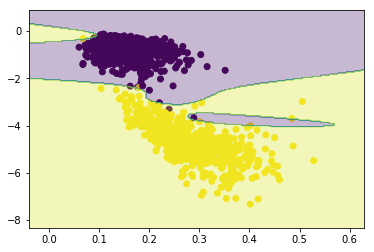

In [14]:
plt.scatter(X15[:,0], X15[:,1], c=ovo15)
plt.contourf(xx1, xx2, clf15.predict(np.c_[xx1.ravel(), xx2.ravel()]).reshape(xx1.shape), alpha=0.3)
plt.show()

In [9]:
x1min, x1max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
x2min, x2max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.linspace(x1min, x1max, 100), np.linspace(x2min, x2max, 100))
plt.contourf(xx1, xx2, clf.predict(np.c_[xx1.ravel(), xx2.ravel()]).reshape(xx1.shape), alpha=0.5)
plt.scatter(train[:, 1], train[:, 2], c=colors)
plt.show()

NameError: name 'clf' is not defined

In [ ]:
print(xx1.shape, xx2.shape)
print(clf.predict(np.c_[xx1.ravel(), xx2.ravel()]).reshape(xx1.shape).shape)

In [ ]:
clf.predict([[0.45, -2]])

In [ ]:
clf.predict([[0.7, -4]])